### Simulating Effect Size, Sample Size, and Significance.


#### Simulating Statistical Distributions using Scipy.Stats

The scipy.stats library has many common statistical tests available. Equally usefully, it contains methods for *simulating* data according to many common statistical distributions (e.g. like the normal distribution). Using simulated datasets is a great way to learn about how to apply statistical methods and when they can go wrong. Let's try it out.

#### Simulating Lizard Lengths

Let's suppose we were studying two species of *Anolis* lizards in the Caribbean. First let's simulate the lengths of lizards from two populations.


In [1]:
from scipy.stats import ttest_ind,norm

n_lizards = 100

#Simulate the lengths of lizard population 1 
pop_1_mean_size = 7.0
#Here we build a normal distribution for population 1
lizards1_dist = norm(loc= pop_1_mean_size,scale=3.0)
#Then we draw random lizards from that population 
lizards1_sample = lizards1_dist.rvs(size=n_lizards)
print("Lizards1_sample:",lizards1_sample)

#Simulate a second lizard population 
pop_2_mean_size = 10.0
lizards2_dist = norm(loc=pop_2_mean_size,scale=5.0)
lizards2_sample = lizards2_dist.rvs(size=n_lizards)
print("Lizards2_sample:",lizards2_sample)


Lizards1_sample: [ 2.93166129  5.23138049  6.37172014  0.87213262  5.9777557   7.16288348
  3.04908021  7.38237047  9.91622822  8.60978835  5.39690873 11.7652011
  7.16469082 10.6410801   1.6009144   7.42434489  4.74559304 10.75496746
 10.96409849  3.68524871  5.07660287  6.10148554  8.45500378  5.69917986
  4.82597546  0.26031952  1.29598934  6.85951177  9.83910219 11.67661679
 12.47065298  3.85898095  4.93341228 10.13472986  4.0331073   7.0239688
  6.60495803  3.77603781  5.72007005  7.89430798  8.35589314  7.96588065
  8.66693199  4.53899385  3.01713247  2.51309983  7.28367341  3.99869589
  5.73022887  7.52470383  3.38780352  5.53522221  6.70003122  7.6594811
 -0.19536593  6.23130301  4.29136218  9.2207477   6.33376559  8.86899176
 11.08665109  5.34331745  8.92663589  8.14813576  5.92805311  6.59120214
  5.55979259 -0.67274804  5.23663651 10.3776878   9.94819572  5.39171093
  8.67349719  9.10216835  7.08725805  4.52972369  4.92989721  7.28858107
  9.94387647 13.83009401  8.50377798 

#### Let's plot the results

The raw numbers above aren't too exciting to look at. Let's construct a histogram of the population so we can see what's going on.

In [2]:
%matplotlib inline
#^ This makes the plots show up in the notebook

from matplotlib.pyplot import hist,xlabel,ylabel,show,figure,axvline,subplots
from numpy import mean

n_bins = 20 # number of histogram bins

def plot_lizard_lengths(pop1_sample,pop2_sample,pop1_color='orange',pop2_color='cyan',alpha=0.5,
    x_axis_label="Measured value",y_axis_label="Frequency in population"):
    """Show a histogram of two population samples
    pop1_sample -- the sample from population 1. Should be a list or array of numbers. 
       for example, the observed lengths of lizards
    pop2_sample -- the sample from population 2.Should be a list or array of numbers. 
       for example, the observed lengths of lizards. 
    pop1_color -- the color for the 1st population in the histogram
    pop2_color -- the color for the 2nd population in the histogram
    alpha -- how opaque to make the histogram
    x_axis_label -- a string with which to label the y-axis 
    y_axis_label -- a string with which to label the y-axis
    """

    #Make a figure
    figure(dpi=300)
    
    #Plot a histogram of the data from each lizard population on the figure
    #NOTE: alpha is a measure of opacity - lower = more transparent
    subplots(1,1)
    hist(pop1_sample,bins=n_bins,color='orange',alpha=0.5)
    hist(pop2_sample,bins=n_bins,color='cyan',alpha=0.5)

    #Draw a vertical line at the mean value for the 1st population
    pop1_sample_mean = mean(pop1_sample)
    axvline(pop1_sample_mean,color='orange')

    #Draw a vertical line at the mean value for the 2nd population
    pop2_sample_mean = mean(pop2_sample)
    axvline(pop2_sample_mean,color='cyan')

    xlabel(x_axis_label)
    ylabel(y_axis_label)

    show()

<Figure size 1800x1200 with 0 Axes>

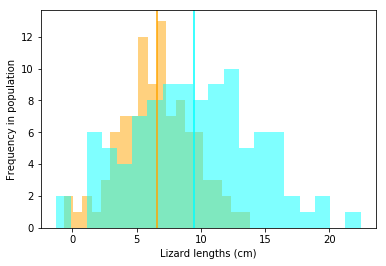

In [3]:
#Now let's run our function on our lizard data to plot it
plot_lizard_lengths(lizards1_sample,lizards2_sample,x_axis_label="Lizard lengths (cm)")

The graph shows a difference, but it may not be obvious whether that difference could be due to chance. Let's test if the distributions are significantly different using a T-test for independence. 

In [4]:
#NOTE: I set equal var = false because I know these two lizard populatins
#have unequal standard deviations and variance
t_stat,pval = ttest_ind(lizards1_sample,lizards2_sample,equal_var=False)
print("T statistic:",t_stat)
print("p-value:",pval)
if pval < 0.05:
    print ("This result meets the conventional threshold for statistical significance")

T statistic: -5.157999815846079
p-value: 7.236465480374594e-07
This result meets the conventional threshold for statistical significance


### Effect size vs. significance

Generally, *larger* effect sizes (here the difference in means) require *fewer* samples to detect significance. Let's try this out together...


1. Try changing the above code so that the difference in lizard lengths between the population is smaller (do this without changing any other parameters). Does the p-value go up (indicating a greater probability of getting the observed difference between populations by chance)?


2. Now increase the sample size (number of lizards sampled). What happens to the p-value?

3. Are you getting frustrated by doing this manually? We can automate the process in a for loop and find by simulation a more general relationship between effect size and signficance.

You an try this yourself or check out the code below...

### A larger simulation of effect size, sample size and statistical significance

First, let's write our above simulation of lizard populations and then t-test for independence  as a function so it is easier to reuse

In [5]:

def simulate_lizard_pop_t_test(pop1_mean,pop2_mean,pop1_std_dev=2.0,pop2_std_dev=2.0,sample_size=100):
    """Simulate a t-test comparing two lizard populations"""
    
    n_lizards = sample_size
    #Define a normal distribution for the 1st pop based on the mean and standard deviation
    lizards1_dist = norm(loc= pop1_mean,scale=pop1_std_dev)

    #Sample from that normal distribution to draw n_lizards (e.g. how many we measured)
    lizards1_sample = lizards1_dist.rvs(size=n_lizards)

    #Simulate a second lizard population in the same way
    lizards2_dist = norm(loc=pop2_mean,scale=pop2_std_dev)
    lizards2_sample = lizards2_dist.rvs(size=n_lizards)
    
    t_stat,pval = ttest_ind(lizards1_sample,lizards2_sample,equal_var=False)
    
    return pval

So if we give this function the true (simulated) means and standard deviations of two populations, along with how many lizards from each population we actually measure, it can return to us a p-value from the T-test for independence. Now let's use this function to plot what happens to our p-values at various effect sizes and sample sizes

/Users/jzaneveld/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/jzaneveld/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<Figure size 1800x1200 with 0 Axes>

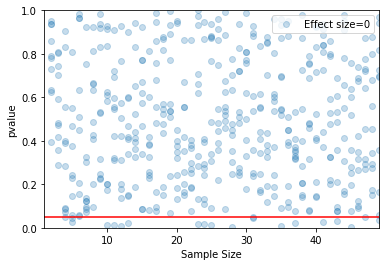

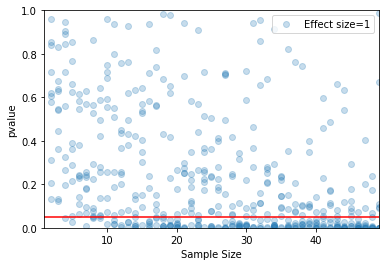

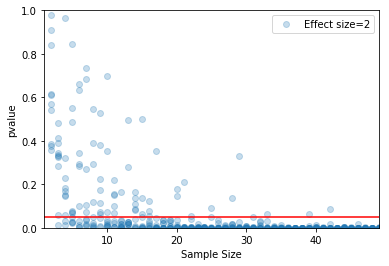

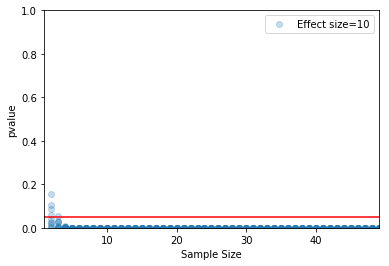

In [6]:
from matplotlib.pyplot import figure,plot,subplots,axis,legend,axhline
from matplotlib.colors import Normalize
effect_sizes = [0,1,2,10]
sample_sizes = [int(x) for x in range(1,50,1)]

#Define population parameters
pop1_mean = 70.0

# We will define the population 2 mean
#below relative to population 1
#using the effect size
pop2_mean = None 

#Set the standard deviation 
#for each population
pop1_std_dev = 2.0
pop2_std_dev = 2.0

n_replicates = 10
figure(dpi=300)
#Iterate over the effect sizes, making a plot
#of p-values vs. sample size for each

for effect_size in effect_sizes:
    
    #This tells matplotlib to make this effect size
    #a new subplot
    subplots(1,1) 
    
    #Set the x and y axis limits (xmin,xmax,ymin,ymax)
    axis([min(sample_sizes),max(sample_sizes),0.0,1.0])
    
    #We'll store the individual sample sizes
    #and p-values in lists
    all_pvals = []
    all_sample_sizes = [] 
    
    #For now let's just assume that the mean size
    #of lizards in population 2 is larger than population 1
    #by an amount equal to effect size
    pop2_mean = pop1_mean + effect_size
    
    #Test the p-value we get from a T-test at each sample size
    #repeat n_replicates times
    for n in sample_sizes:
        for i in range(n_replicates):
            pval = simulate_lizard_pop_t_test(pop1_mean=pop1_mean,\
                                              pop2_mean=pop2_mean,\
                                              pop1_std_dev = pop1_std_dev,\
                                              pop2_std_dev = pop2_std_dev,\
                                              sample_size = n)
            all_pvals.append(pval)
            all_sample_sizes.append(n)
    
    
    plot(all_sample_sizes,all_pvals,'o',\
     label="Effect size=%s" %effect_size,alpha=0.25)
    
    #Label p = 0.05 (the standard cutoff for statistical significance)
    #with a horizontal red line
    axhline(y=0.05, color='r', linestyle='-')
    legend(loc='upper right')
    xlabel("Sample Size")
    ylabel("pvalue")



In the above plots the x-axis represents the sample size, while the y-axis represents the p-value for our T-test of independence between the two populations of lizards. Each graph going down is a larger effect size (here the difference in means between the two populations).

There are several things to notice here:

1. __We get signficant results 5% of the time even if there is *no difference* between the populations__. Even when the effect size is 0 (top graph), some runs of the simulation give significant results. This is represented by p-values below the red line (p < 0.05) in the first graph. These represent *false positive* results (also called Type I errors). By definition, we expect these to occur 5% of the time (that's what we mean when we say p = 0.05!). This is critically important to understand - we'll draw on and explore this idea much more in the section on dealing with multiple comparisons.

2. __Increasing sample size gives us greater power to establish that differences between the populations are statistically significant__. If there *is* a true difference in size between the lizard populations (e.g. effect size > 0), then the more lizards we measure (i.e. the larger the sample size), the more likely we are to see that difference as statistically significant. You can verify this by noting that the further right we move on the x-axis in any of the bottom 3 graphs, the more points fall below the threshold for significance of p = 0.05 (i.e. below the red line).

3. __As the effect size increases, fewer samples are required to establish statistical significance__. In the second graph, where the lizard populations differ by 1 cm in mean length, we *still* don't always see statistical significance, even when we measure 50 lizards from each population. In the bottom graph, where lizards differ in length by 10cm on average, we only need to measure roughly 5-10 lizards from each population to establish that they significantly differ in length. 

#### Questions

1. How do you think the standard deviation of lengths within the two populations will affect our ability to detect significant differences? For example, if both populations had twice the standard deviation as they do in our simulation, how would you expect that to affect significance across effect sizes? (A qualitative answer is fine for now)

2. Check your intuition by modifying the simulation above to use the new parameters for the standard deviation of each population. How big of a deal was this change of variance relative to sample size?